<small><i>(c) October 2016 - This notebook was created by [Oriol Pujol Vila](http://www.maia.ub.es/~oriol).</i></small>

# Probabilistic models

# Parametric versus non parametric


Does the model have a finite set of parameteres of do the grow with the amount of data? The former is called **parametric models** and the latter is called a **non-parametric model**. Parametric models are faster to use but make stronger assumptions about the nature of the data distributions. Non-parametric models are more flexible but may be computationally intractable when the amount of data is large.

# A simple non-parametric model

A simple example of a non-parametric classifier is the K nearest neighbor. This simple looks for the most similar K points in the training set and counts the amount of elements for each class and returns the empirical fraction as teh estimate,

$$\mathbb{P}(y=c|x,D,K) = \frac{1}{K}\sum_{i\in N_K(x,D)} \mathbb{1}(y_i=c)$$

where $N_K(x,D)$ are the inidces of the $K$ nearest points to $x$ in $D$ and $\mathbb{1}(c)$ is the indicator funtion. This is an example of **memory-based** or **instance-based learning**.

# Probabilistic models

Probabilistic models are based on the modeling de distribution of data $p(x)$. In this sense they are a natural choice for unsupervised data analysis. As we will see later Tthe key concept in probabilistic models is going to be the factorization of the joint probability density function by assuming or explicitly showing independences.

In the supervised setting we are looking for modeling the conditional distribution, $p(y|x)$. This is the probability of the labels having observed a certain sample. In this setting the joint probability of labels and data $p(x,y)$ is not necessary and we will be using Bayes Rule, that states the following,

$$p(Y=y|X=x) = \frac{p(X=x|Y=y)p(Y=y)}{p(X=x)} = \frac{p(X=x|Y=y)p(Y)}{\int p(X=x|Y=y)p(Y=y) dy}$$

A classifier that takes into account the former rule is called **generative classifier** since it specifies how to generate data using **class conditional density or likelihood** $p(x|y)$ and the **class prior**, $p(y)$.

An alternative probabilistic approach to generative classifiers are **discriminative classifiers** that directly fit the **class posterior** $p(y = c|x)$.



# Generative models for discrete data

Let us start our discusion on probabilistic models 

Recall that by applying Bayes rule we have that the probability of a sample to belong to one class is 

$$p(y=c|x,\theta) \propto p(x|y = c,\theta)p(y = c|\theta)$$

The key to using these models is specifying a suitable form for the class-conditional density $p(x|y = c,\theta)$ which defines what kind of data we expect to see in each class according to some parameters $\theta$ governing the model. 

In this context the **likelihood** accounts for the probability of generating that particular data assuming it belongs to a certain model or class. The **prior** is a subjective belief of probable is this model.




<div class = "alert alert-success" style = "border-radius:10px"> **EXERCISE: **

Following Murphy's example, suppose that we are hypothesizing about a number generating function. Up to this point we don't have much information. We can, however, hypothesize about the process generating the values. We could think about many different hypothesis, such as `number generator`, `even number generator`, `odd number generator` , `numbers ended with 9`, `even numbers except 32`, `powers of 2`. With this information however we can check the different concepts involved.

For example:
<ol>
<li>What is the likelihood for all these hypotheses?</li>
<li>What is the prior for these hypotheses?</li>
<li>How is our prior belief after seeing example $\{16\}$?</li>
<li>and after seeing examples $\{16, 64, 8\}$?</li>
</ol>

</div>


After applying the Bayesian rule we obtain a probability density function on the hypotheses space. If we have to report one we could proceed in different ways. We can report the **Maximum A Posteriori (MAP)**, which corresponds to the mode of the posterior and can be written as, 

$$\hat{h}^{MAP} = \arg\max_h p(D|h)p(h) = \arg\max_h [\log(p(D|h)) + \log(p(h))]$$

Usually the likelihood term depends on the number of samples. Then, as we get more data the MAP converges towards the **Maximum Likelihood Estimate (MLE)**

$$\hat{h}^{MLE} = \arg\max_h p(D|h) = \arg\max_h \log(p(D|h))$$



# The Beta-Binomial model

Suppose a random variable $X_i\sim \text{Ber}(\theta)$, where $X_i = 1$ represents "heads", $X_i = 0$ represents "tails", and $\theta\in [0,1]$ is the rate parameter (probability of heads). If data are iid, the likelihood has the form

$$p(D|\theta) = \theta^{N_1}(1-\theta)^{N_2}$$

where $N_1$, and $N_2$ are the heads and tails counts. What we are working out in this exercise works also for Binomial distributions, i.e. the probability of observing $N_1$ heads in $N$ tosses

$$\text{Bin}(k|N,D) = \big(\begin{align}N\\k \end{align}\big) \theta^k(1-\theta)^{N-k}$$.


We need a prior that has support over the interval $[0,1]$. We could use the same form as the likelihood. The prior could look like,

$$p(\theta) \propto \theta^{\gamma_1}(1-\theta)^{\gamma_2}$$

When the prior and the posterior have the same form, such as in this case, we say the prior is a **conjugate prior** for the corresponding likelihood. In the case of Bernoulli or Binomial, the conjugate prior is the beta distribution, that has the following form

$$\text{Beta}(\theta|a,b) \propto \theta^{a-1}(1-\theta)^{b-1}$$

The parameters of the prior are called **hyperparameters** and we can set them to encode prior belief. 


(0, 1)

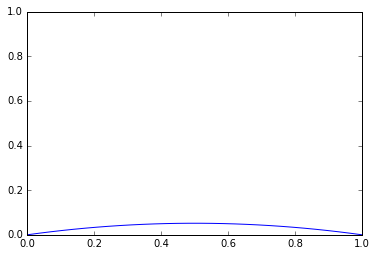

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

theta = np.linspace(0,1,30)

a=2
b=2

beta = theta**(a-1)*(1-theta)**(b-1)
prior= beta/np.sum(beta)

plt.plot(theta,prior)
plt.gca().set_ylim([0,1])

If we multipy the likelihood by the beta prior we get the following posterior. Suppose that we observe one heads. Then the likehood is 

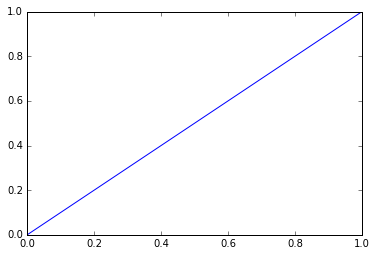

In [2]:
likelihood = theta

plt.plot(theta,likelihood)

Observe that the likelihood does not necessarily is a probability density function and does not need to sum up to one.

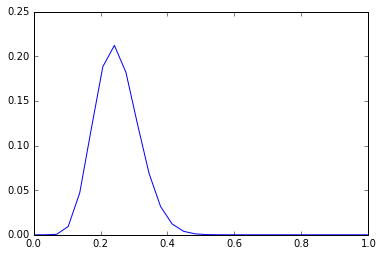

In [17]:
posterior = likelihood*prior

posterior = posterior/np.sum(posterior)
plt.plot(theta,posterior)

Interestingly enough we can now consider this last result as a new prior and repeat the process with a new observation. Consider a new head.

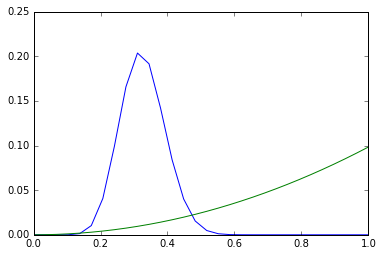

In [22]:
prior = posterior
# a new head
likelihood = theta

# a new tail would be:
#likelihood = (1-theta)  

posterior = likelihood * prior
posterior = posterior/np.sum(posterior)


accum_likelihood = theta*theta
accum_likelihood_normalized = accum_likelihood/np.sum(accum_likelihood)

plt.plot(theta,posterior, label ="posterior")
plt.plot(theta,accum_likelihood_normalized, label="Accum likelihood")




This resembles the effect of *online methods*. Observe that the MAP value is different than the mean posterior and the MLE. They correspond to 

$$\hat{\theta}_{MAP} = \frac{a+N_1-1}{a+b+N-2} $$

with a uniform prior, MAP is reduced to MLE,

$$\hat{\theta}_{MLE} = \frac{N_1}{N} $$

By contrast the posterior mean is 

$$\bar{\theta} = \frac{a+N_1}{a+b+N}$$

# The Diritchlet-multinomial model

In the case we have a multinomial random variable, for example, topics in a document text we have a probability simplex. The probability density function will operate over that simplex. 

## Likelihood

Suppose we observe $N$ dice rolls, $D = \{x_1,\dots,x_N\}$ if we assume the data is iid, the likelihood has the form

$$p(D|\theta) = \prod_{k=1}^K \theta_k^{N_k}$$

where $N_k = \sum_{i=1}^N \mathbb{1}(y_i=k)$ is the number of times event $k$ occurred

## Prior

Since the parameter vector lives in the K-dimensional probability simplex, we need a prior that has support over this simplex. The Dirichlet distribution ahs the followin gprior

$$\text{Dir}(\theta|\alpha) = \frac{1}{B(\alpha)}\prod_{k=1}^K \theta_k^{\alpha_k-1}\mathbb{1}(x\in S_k)$$



## Posterior

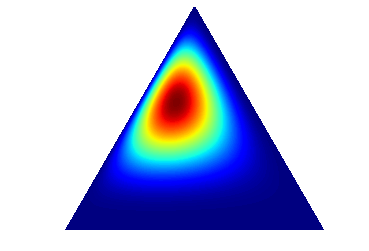

In [23]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

    
# Mid-points of triangle sides opposite of each corner
midpoints = [(corners[(i + 1) % 3] + corners[(i + 2) % 3]) / 2.0 for i in range(3)]
def xy2bc(xy, tol=1.e-3):
    '''Converts 2D Cartesian coordinates to barycentric.'''
    s = [(corners[i] - midpoints[i]).dot(xy - midpoints[i]) / 0.75 for i in range(3)]
    return np.clip(s, tol, 1.0 - tol)

class Dirichlet(object):
    def __init__(self, alpha):
        from math import gamma
        from operator import mul
        self._alpha = np.array(alpha)
        self._coef = gamma(np.sum(self._alpha)) / reduce(mul, [gamma(a) for a in self._alpha])
    def pdf(self, x):
        '''Returns pdf value for `x`.'''
        from operator import mul
        return self._coef * reduce(mul, [xx ** (aa - 1) for (xx, aa)in zip(x, self._alpha)])


def draw_pdf_contours(dist, nlevels=200, subdiv=8, **kwargs):
    import math

    refiner = tri.UniformTriRefiner(triangle)
    trimesh = refiner.refine_triangulation(subdiv=subdiv)
    pvals = [dist.pdf(xy2bc(xy)) for xy in zip(trimesh.x, trimesh.y)]

    plt.tricontourf(trimesh, pvals, nlevels, **kwargs)
    plt.axis('equal')
    plt.xlim(0, 1)
    plt.ylim(0, 0.75**0.5)
    plt.axis('off')
    
    
draw_pdf_contours(Dirichlet([3,2,5]))

# Naive Bayes

## 2.1 Basic document representation

In text classification, we are given a description $x \in {\bf R}^d$ of a document $\delta$ and a fixed set of classes $y \in \{c_1, \dots, c_K\}$, for example the document topic. Given a new document, our goal is to predict the most probable class.

A very simple description of a document is the **bag-of-words** description. This representation transforms a complete text to a vector of $d$ predefined words. The set of predefined words is selected by the practicioner. For example, the list can consist of the set of all words in a given language. 

<b>Example 1:</b>
Suppose we are given four different documents belonging to the topics $y=\{\text{'economics'},\text{'technology'}\}$ and we select as our representation the following bag-of-words $x = \{\text{'market'}, \text{'stock'}, \text{'price'}, \text{'application'}, \text{'mobile'}, \text{'google'}\}$. We can count the number of times a certain term appears in that document and expect that this description is discriminative enough for identifying the document topic. Check the following example:

<table border="1">
<tr>
<td></td>
<td>market</td>
<td>stock</td>
<td>price</td>
<td>application</td>
<td>mobile</td>
<td>google</td>
</tr>
<tr>
<td>document 1($\text{'economics'}$)</td>
<td>1</td>
<td>2</td>
<td>3</td>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>
<tr>
<td>document 2($\text{'economics'}$)</td>
<td>0</td>
<td>1</td>
<td>2</td>
<td>0</td>
<td>0</td>
<td>1</td>
</tr>
<tr>
<td>document 3($\text{'technology'}$)</td>
<td>0</td>
<td>0</td>
<td>0</td>
<td>2</td>
<td>3</td>
<td>1</td>
</tr>
<tr>
<td>document 4($\text{'technology'}$)</td>
<td>1</td>
<td>0</td>
<td>1</td>
<td>2</td>
<td>3</td>
<td>0</td>
</tr>
</table>

In this representation, document 2 is represented by the vector (0,1,2,0,0,1). We can alternatively use a binary value representing whether a term appears or not in the document. In this last case document would be represesnted by (0,1,1,0,0,1).

Observe that this is a context free representation, i.e. the order of the words is not considered. Consider the sentences "Google reduces the prices of applications in App market" and "The number of aplications in Google App market with cheap prices is reduced by 20%". The representation for both sentences is the same, though the exact meaning of both sentences is completely different. However, this kind of representation may be enough for identifying that both refers to $\text{'technology'}$.

In [24]:
""" 
 Xiaoxia: 
     - multibinomial: p(doc3|y="tech") = p(app|"tech")x p(app|"tech")xp(movile|"tech")...
     - binomial: p(doc3|y="tech") = p(app=1|"tech") x p(mobile=1|"tech") x p(google=1|"tech") 
"""


' \n Xiaoxia: \n     - multibinomial: p(doc3|y="tech") = p(app|"tech")x p(app|"tech")xp(movile|"tech")...\n     - binomial: p(doc3|y="tech") = p(app=1|"tech") x p(mobile=1|"tech") x p(google=1|"tech") \n'

## 2.2 The Naive Bayes classifier

Naive Bayes is an instance of a Bayessian classifier. In this framework, the problem of classification consists of selecting the class with Maximum A Posteriori (MAP) probability, i.e. $$\hat{y} = \arg\max_y p(y|x).$$

Eg. If p(y = "Tech"|x= doc1) > p(y = "economy"|x= doc1), we would say that the doc1 topic probably is Tech

In order to find this quantity we use the Bayes equation,

$$ p(x,y) = p(x|y)p(y) = p(y|x)p(x),$$

and

$$ p(y|x) = \frac{p(x|y)p(y)}{p(x)}.$$

In order to compute the MAP the quantities $p(x|y)$, $p(y)$, $p(x)$ have to be estimated from observed data.

In the problem of document classification, our goal is to select the class with MAP probability. For example, we will select the cathegory $\text{'economics'}$ for a text with description (1,1,1,0,0,0) only if $P(y = \text{'economics'}|x = (1,1,1,0,0,0)) > P(y = \text{'technology'}|x = (1,1,1,0,0,0))$. 

Note that $p(x)$ is a constant value and it does not affect the decision, thus we just need to compute

$$P(y|x) \propto P(y)P(x|y)$$

Estimating the likelihood term, $P(x|y)$, accounts for computing the probability of certain description vector in a given class, e.g. the probability of a text in $\text{'economics'}$ having a description $x = (1,1,1,0,0,0)$ (the value of the probability that a description x = (1,1,1,0,0,0) has inside the category $\text{'economics'}$), $p(x = (1,1,1,0,0,0)|y = \text{'economics'})$

Up to this point, the description of the classifier is general for any Bayessian classifier. *Naive Bayes additionally assumes that $x$ is composed of a set of $d$ independent variables.* This allows to rewrite the likelihood term as
$$p(x_1,x_2,...,x_N | y) = p(x_1|y)p(x_2|y)...p(x_N|y) = \prod\limits_{i=1}^N p(x_i|y)$$

For example, in our case 
$$P(x = (1,1,1,0,0,0)|y = \text{'tech'}) = P(x_1=1|y = \text{'tech'})P(x_2=1|y = \text{'tech'})P(x_3=1|y = \text{'tech'})P(x_4=0|y = \text{'tech'})P(x_5=0|y = \text{'tech'})P(x_6=0|y = \text{'tech'})$$

This is understood as the fact that the probability of a document described as x = (1,1,1,0,0,0) is described by the product of the probilities that the first to the third word are present, and the fourth to the sixth word are not.

In the end, the Naive Bayes classifier has the following form,
$$p(y|x) \propto p(y)\prod\limits_{i=1}^N p(x_i|y)$$


In many cases the prior $p(y)$ is unknown or simply we prefer to use a non-informative prior (all documents have the same probability of appearance in our context ($p(y)$)). In that case the formulation is simplified to the Maximum Likelihood Estimate.

## 2.3 Estimating conditioned probabilities 

The last remaining step is the estimation of the individual conditional probabilities. There are two classical variants the **Multinomial Naive Bayes** and the **Bernoulli Naive Bayes**. The difference between both lies in the goal of what they are modeling. **In Multinomial NB we compute the probability of generating the observed document.** In this sense, we multiply the conditional probability of each word in the document for all words present in the document. An alternative view is the *Bernoulli model*. **In the Bernoulli Naive Bayes we compute the probability of the binary bag-of-words descriptor.** Observe that in the Bernouilli Naive Bayes the final probability depends on the words that appear in the document but also on the words that do not appear while in the multinomial NB it only depends on the words that appear. On the contrary, multinomial naive bayes takes into account the multiplicity of the words in the document while Bernoulli does not. Let us consider in this example the *Bernoulli model* that is consistent with our representation where a zero indicates a word is not present in the document and a one represents it is present. In order to estimate this probability we can use a frequentist approximation to probability, i.e. we will estimate the probability as the frequency of appearance of each term in each category. This computation divides the number documents where the word appears over the total number of documents. 

In our previous example, $p(x_3=1 (\text{the word 'price' appears})|y =\text{'tech'}) = 1/2$ and $p(x_3=1 (\text{the word 'price' appears})|y =\text{'eco'}) = 2/2$. This is computed by dividing the number of documents where the word price appear in a given category over the number of documents of that category.

### 2.3.1 The zero probability effect
In the former example the probability $p(x_5=1|y=\text{'eco'}) = 0$. This implies that if the word 'mobile' appears the document can not belong to the class $\text{'economy'}$. It is unreasonable to completely penalize a whole class by the appearance or not appearance of a single word. It is customary to assign to those cases a very low probability value instead. One well known approach to correct this effect is the so called **Laplace correction**. It is computed as follows,

$$p(x_i=1 | y=c_k ) = \frac{\text{# of documents of class } c_k \text{ where word } x_i \text{ appears} + 1}{\text{# of documents of class } c_k + M}$$

where $M$ is the amount of words in the description. 

### 2.3.2 Underflow effect

As the number of words in the description increase there is a higher probability that many of those words will not be present in the document. The product of many very small values may lead to floating point underflow effects. For this reason it is usual to use the log probability instead. This transformation does not change the decision boundary. In our simplified case

$$\log p(x|y) = \sum\limits_{i=1}^N \log p(x_i|y)$$

Let us code an even more simpler version of Naive Bayes, a Bernoulli generative version. This is just to even simplify more our code, so don't expect to work well.

In [25]:
import numpy as np

class SimpleNaiveBayes():
    def __init__(self):
        self.prob_vec={}
        self.classes =[]
        
    def fit(self,X,y):
        # extract the probabilities for each element for different classes
        self.classes = np.unique(y)
        for c in self.classes:
            idx=np.where(y==c)[0]
            N = len(idx)
            self.prob_vec[c] = np.log(np.sum(X[idx,:],axis=0)/N+1e-10)  # apply
        
    def predict_proba(self,X):
        #Output matrix N_documents X N_classes
        probs = np.zeros((X.shape[0],len(self.classes)))
        i=0
        for k in self.classes:

            probs[:,i]=np.dot(X,self.prob_vec[k].T).ravel()
            i+=1
        return probs
    
    def predict(self,X):
        return self.classes[np.argmax(self.predict_proba(X),axis =1)]

Let us try 

In [26]:
X=np.array([[1,1,1,0,0,0],[0,1,1,0,0,1],[0,0,0,1,1,1],[1,0,1,1,1,0]],dtype=np.float)

In [27]:
y = [0,0,1,1]

In [28]:
clf = SimpleNaiveBayes()

In [29]:
clf.fit(X,y)

In [30]:
clf.classes

array([0, 1])

In [31]:
clf.prob_vec

{0: array([ -6.93147180e-01,   1.00000008e-10,   1.00000008e-10,
         -2.30258509e+01,  -2.30258509e+01,  -6.93147180e-01]),
 1: array([ -6.93147180e-01,  -2.30258509e+01,  -6.93147180e-01,
          1.00000008e-10,   1.00000008e-10,  -6.93147180e-01])}

In [32]:
clf.predict_proba(X)

array([[ -0.69314718, -24.41214529],
       [ -0.69314718, -24.41214529],
       [-46.74484904,  -0.69314718],
       [-46.74484904,  -1.38629436]])

In [33]:
clf.predict(X)

array([0, 0, 1, 1])

In [34]:
#load data
import pandas as pd
data=pd.read_csv('./files/Boydstun_NYT_FrontPage_Dataset_1996-2006_0.csv')
data.head()

IOError: File ./files/Boydstun_NYT_FrontPage_Dataset_1996-2006_0.csv does not exist

Let us split the data set in two set: 
    
+ We will train the classifier with news up to 2004.
+ We will test the classifier in news from 2005 and 2006.

In [ ]:
import numpy as np
#Let us train the classifier with data up to 1/1/2004 and test its performnace in data from 2004-2006
split = pd.to_datetime(pd.Series(data['Date']))<pd.datetime(2004, 1, 1)
raw_data = data['Title']
raw_train = raw_data[split]
raw_test = raw_data[np.logical_not(split)]
y = data['Topic_2digit']
y_train = y[split]
y_test = y[np.logical_not(split)]
print 'Check the split sizes, train, test and total amount of data:'
print raw_train.shape, raw_test.shape, raw_data.shape
print 'Display the labels:'
print np.unique(y)


In [12]:
# Let us tokenize the data
from sklearn.feature_extraction.text import CountVectorizer

# We use the count number of instances considering that a word has a minimum support of two documents
vectorizer = CountVectorizer(min_df=2, 
# stop words such as 'and', 'the', 'of' are removed                             
 stop_words='english', 
 strip_accents='unicode')

#example of the tokenization
test_string = unicode(raw_train[0])
print "Example: " + test_string +"\n"
print "Preprocessed: " + vectorizer.build_preprocessor()(test_string)+"\n"
print "Tokenized:" + str(vectorizer.build_tokenizer()(test_string))+"\n"
print "Analyzed data string:" + str(vectorizer.build_analyzer()(test_string))+"\n"


#Process and convert data
X_train = vectorizer.fit_transform(raw_train)
X_test = vectorizer.transform(raw_test)

print "Number of tokens: " + str(len(vectorizer.get_feature_names())) +"\n"
print "Extract of tokens:"
print vectorizer.get_feature_names()[1000:1100]


Example: Nation's Smaller Jails Struggle To Cope With Surge in Inmates 

Preprocessed: nation's smaller jails struggle to cope with surge in inmates 

Tokenized:[u'Nation', u'Smaller', u'Jails', u'Struggle', u'To', u'Cope', u'With', u'Surge', u'in', u'Inmates']

Analyzed data string:[u'nation', u'smaller', u'jails', u'struggle', u'cope', u'surge', u'inmates']

Number of tokens: 8950

Extract of tokens:
[u'boeing', u'boiling', u'boils', u'bold', u'bolster', u'bolsters', u'bolt', u'bolts', u'bomb', u'bombay', u'bombed', u'bomber', u'bombers', u'bombing', u'bombings', u'bombs', u'bonanza', u'bond', u'bondage', u'bonds', u'bone', u'bones', u'bonn', u'bono', u'bonus', u'bonuses', u'book', u'books', u'booksellers', u'bookstore', u'boom', u'boomers', u'booming', u'booms', u'boost', u'boot', u'bora', u'border', u'borders', u'born', u'borough', u'boroughs', u'borrow', u'borrowing', u'bosnia', u'bosnian', u'bosnians', u'boss', u'bosses', u'boston', u'botched', u'bottle', u'bought', u'bounce', u'

classification accuracy: 0.439194630872
Classification Report:
             precision    recall  f1-score   support

          1       0.44      0.30      0.35       169
          2       0.24      0.31      0.27       219
          3       0.47      0.51      0.49       406
          4       0.07      0.10      0.08        21
          5       0.27      0.30      0.28       162
          6       0.30      0.36      0.32       166
          7       0.20      0.19      0.19        58
          8       0.14      0.21      0.17        47
         10       0.23      0.29      0.25        96
         12       0.45      0.32      0.37       603
         13       0.19      0.17      0.18        47
         14       0.10      0.25      0.14        55
         15       0.27      0.33      0.30       272
         16       0.54      0.51      0.52      1418
         17       0.25      0.37      0.30        95
         18       0.08      0.06      0.07        33
         19       0.63      0.47   

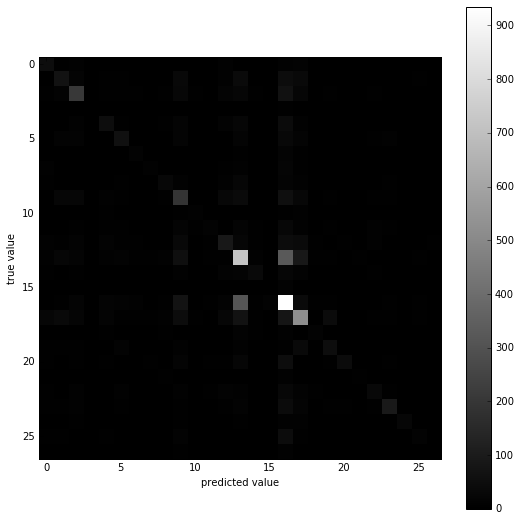

In [14]:
%matplotlib inline

X_train = X_train.todense()
X_train = X_train.astype(np.float)
X_test = X_test.todense()
X_test = X_test.astype(np.float)
y_train = np.array(y_train.tolist())


clf = SimpleNaiveBayes()
clf.fit(X_train,y_train)
y_hat = clf.predict(X_test)

#from sklearn.naive_bayes import BernoulliNB
#nb = BernoulliNB()
#nb.fit(X_train,y_train)
#y_hat = nb.predict(X_test)


from sklearn import metrics
import matplotlib.pyplot as plt
def plot_confusion_matrix(y_pred, y):
    plt.imshow(metrics.confusion_matrix(y, y_pred), interpolation='nearest',cmap='gray')
    plt.colorbar()
    plt.ylabel('true value')
    plt.xlabel('predicted value')
    fig = plt.gcf()
    fig.set_size_inches(9,9)    
    
print "classification accuracy:", metrics.accuracy_score(y_hat, y_test)
plot_confusion_matrix(y_hat, y_test)
print "Classification Report:"
print metrics.classification_report(y_hat,np.array(y_test))

classification accuracy: 0.434899328859
Classification Report:
             precision    recall  f1-score   support

          1       0.32      0.64      0.43        56
          2       0.01      0.67      0.01         3
          3       0.51      0.65      0.57       343
          4       0.00      0.00      0.00         0
          5       0.01      1.00      0.01         1
          6       0.13      0.96      0.23        27
          7       0.00      0.00      0.00         0
          8       0.00      0.00      0.00         0
         10       0.00      0.00      0.00         0
         12       0.46      0.43      0.44       466
         13       0.00      0.00      0.00         0
         14       0.00      0.00      0.00         0
         15       0.09      0.54      0.16        57
         16       0.54      0.57      0.55      1259
         17       0.03      1.00      0.06         4
         18       0.00      0.00      0.00         0
         19       0.81      0.34   

/Users/oriol/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1076: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


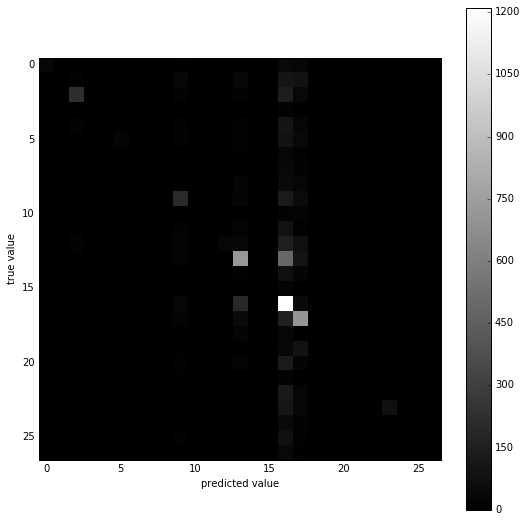

In [15]:
%matplotlib inline
#Fit a Bernoulli Naive Bayes

from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB()
nb.fit(X_train,y_train)
y_hat = nb.predict(X_test)


from sklearn import metrics
import matplotlib.pyplot as plt
def plot_confusion_matrix(y_pred, y):
    plt.imshow(metrics.confusion_matrix(y, y_pred), interpolation='nearest',cmap='gray')
    plt.colorbar()
    plt.ylabel('true value')
    plt.xlabel('predicted value')
    fig = plt.gcf()
    fig.set_size_inches(9,9)    
    
print "classification accuracy:", metrics.accuracy_score(y_hat, y_test)
plot_confusion_matrix(y_hat, y_test)
print "Classification Report:"
print metrics.classification_report(y_hat,np.array(y_test))

<div class = "alert alert-success">**QUESTION:** Identify the three most simple classes.
</div>

In [17]:
#What are the top N most predictive features per class?
N = 5
voc = vectorizer.get_feature_names()
for i, label in enumerate(np.unique(y)):
    topN = np.argsort(nb.coef_[i])[-N:]
    print 'Code: '+ str(label) + ' Terms : '+ str([voc[i] for i in topN])

Code: 1 Terms : [u'cut', u'bush', u'economy', u'budget', u'tax']
Code: 2 Terms : [u'race', u'gay', u'new', u'court', u'abortion']
Code: 3 Terms : [u'care', u'medicare', u'drug', u'health', u'new']
Code: 4 Terms : [u'farm', u'safety', u'new', u'farmers', u'food']
Code: 5 Terms : [u'workers', u'strike', u'union', u'immigrants', u'new']
Code: 6 Terms : [u'students', u'city', u'new', u'school', u'schools']
Code: 7 Terms : [u'rules', u'warming', u'air', u'new', u'pollution']
Code: 8 Terms : [u'blackout', u'california', u'power', u'energy', u'oil']
Code: 10 Terms : [u'new', u'security', u'800', u'flight', u'crash']
Code: 12 Terms : [u'drug', u'case', u'death', u'new', u'police']
Code: 13 Terms : [u'plan', u'security', u'new', u'social', u'welfare']
Code: 14 Terms : [u'city', u'homeless', u'york', u'rent', u'new']
Code: 15 Terms : [u'new', u'billion', u'deal', u'enron', u'microsoft']
Code: 16 Terms : [u'bush', u'challenged', u'war', u'iraq', u'nation']
Code: 17 Terms : [u'space', u'nasa', u'l

Let us check what would happen if we enrich the data set with the summary of the article.

In [18]:
raw_data = data['Title']+data['Summary']
raw_train = raw_data[split]
raw_test = raw_data[np.logical_not(split)]
y = data['Topic_2digit']
y_train = y[split]
y_test = y[np.logical_not(split)]

In [19]:
# Let us tokenize the data
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=2, 
 stop_words='english', 
 strip_accents='unicode')

#example
test_string = unicode(raw_train[0])
print "Example: " + test_string +"\n"
print "Preprocessed: " + vectorizer.build_preprocessor()(test_string)+"\n"
print "Tokenized:" + str(vectorizer.build_tokenizer()(test_string))+"\n"
print "Analyzed data string:" + str(vectorizer.build_analyzer()(test_string))+"\n"


#Fit and convert data
X_train = vectorizer.fit_transform(raw_train)
X_test = vectorizer.transform(raw_test)

print "\n"
print "Number of tokens: " + str(len(vectorizer.get_feature_names())) +"\n"
print "Extract of tokes:"
print vectorizer.get_feature_names()[1000:1100]

Example: Nation's Smaller Jails Struggle To Cope With Surge in Inmates Jails overwhelmed with hardened criminals

Preprocessed: nation's smaller jails struggle to cope with surge in inmates jails overwhelmed with hardened criminals

Tokenized:[u'Nation', u'Smaller', u'Jails', u'Struggle', u'To', u'Cope', u'With', u'Surge', u'in', u'Inmates', u'Jails', u'overwhelmed', u'with', u'hardened', u'criminals']

Analyzed data string:[u'nation', u'smaller', u'jails', u'struggle', u'cope', u'surge', u'inmates', u'jails', u'overwhelmed', u'hardened', u'criminals']



Number of tokens: 11354

Extract of tokes:
[u'banned', u'banner', u'banning', u'bans', u'bansenate', u'banus', u'baptist', u'baptists', u'bar', u'barak', u'barbie', u'bare', u'barely', u'bares', u'bargain', u'bargaining', u'bargains', u'barnes', u'barney', u'baron', u'barons', u'barrage', u'barred', u'barrel', u'barren', u'barrier', u'barriers', u'barring', u'bars', u'barter', u'base', u'baseball', u'based', u'basement', u'bases', u'b

classification accuracy: 0.515570469799
Classification Report:
             precision    recall  f1-score   support

          1       0.45      0.61      0.52        83
          2       0.06      0.94      0.11        18
          3       0.69      0.59      0.63       514
          4       0.00      0.00      0.00         0
          5       0.03      0.67      0.06         9
          6       0.46      0.87      0.61       106
          7       0.00      0.00      0.00         0
          8       0.00      0.00      0.00         0
         10       0.01      0.50      0.02         2
         12       0.61      0.41      0.49       651
         13       0.00      0.00      0.00         0
         14       0.00      0.00      0.00         0
         15       0.23      0.55      0.32       136
         16       0.70      0.64      0.67      1466
         17       0.06      1.00      0.11         8
         18       0.00      0.00      0.00         0
         19       0.77      0.41   

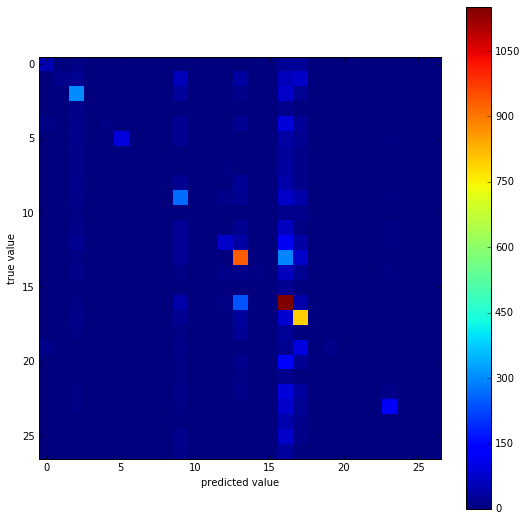

In [20]:
from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB()
nb.fit(X_train,y_train)

y_hat = nb.predict(X_test)
from sklearn import metrics
import matplotlib.pyplot as plt
def plot_confusion_matrix(y_pred, y):
    plt.imshow(metrics.confusion_matrix(y, y_pred), interpolation='nearest')
    plt.colorbar()
    plt.ylabel('true value')
    plt.xlabel('predicted value')
    fig = plt.gcf()
    fig.set_size_inches(9,9)    
    
print "classification accuracy:", metrics.accuracy_score(y_hat, y_test)
plot_confusion_matrix(y_hat, y_test)
print "Classification Report:"
print metrics.classification_report(y_hat,np.array(y_test))

In [21]:
#What are the top N most predictive features per class?
N = 5
voc = vectorizer.get_feature_names()
for i, label in enumerate(np.unique(y)):
    topN = np.argsort(nb.coef_[i])[-N:]
    print 'Code: '+ str(label) + ' Terms : '+ str([voc[i] for i in topN])

Code: 1 Terms : [u'cut', u'economy', u'market', u'budget', u'tax']
Code: 2 Terms : [u'gay', u'race', u'new', u'court', u'abortion']
Code: 3 Terms : [u'medicare', u'care', u'drug', u'new', u'health']
Code: 4 Terms : [u'disease', u'farm', u'new', u'farmers', u'food']
Code: 5 Terms : [u'new', u'workers', u'strike', u'union', u'immigrants']
Code: 6 Terms : [u'education', u'students', u'new', u'schools', u'school']
Code: 7 Terms : [u'water', u'pollution', u'new', u'global', u'warming']
Code: 8 Terms : [u'gas', u'prices', u'energy', u'oil', u'power']
Code: 10 Terms : [u'investigation', u'800', u'twa', u'flight', u'crash']
Code: 12 Terms : [u'death', u'scandal', u'abuse', u'new', u'police']
Code: 13 Terms : [u'security', u'clinton', u'social', u'new', u'welfare']
Code: 14 Terms : [u'housing', u'york', u'rent', u'nyc', u'new']
Code: 15 Terms : [u'new', u'merger', u'scandal', u'antitrust', u'microsoft']
Code: 16 Terms : [u'bush', u'challenged', u'war', u'nation', u'iraq']
Code: 17 Terms : [u'lo

And now try with our own Simple Naive Bayes

classification accuracy: 0.505637583893
Classification Report:
             precision    recall  f1-score   support

          1       0.50      0.46      0.48       125
          2       0.29      0.47      0.36       174
          3       0.59      0.60      0.60       428
          4       0.20      0.46      0.28        13
          5       0.29      0.39      0.33       140
          6       0.45      0.57      0.51       158
          7       0.32      0.47      0.38        38
          8       0.26      0.68      0.38        28
         10       0.26      0.46      0.33        70
         12       0.50      0.36      0.42       619
         13       0.16      0.28      0.21        25
         14       0.10      0.38      0.15        37
         15       0.30      0.43      0.36       233
         16       0.60      0.53      0.57      1519
         17       0.30      0.50      0.38        86
         18       0.16      0.21      0.18        19
         19       0.68      0.46   

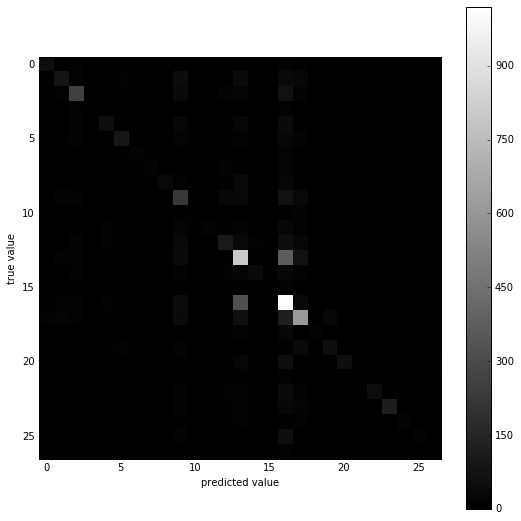

In [22]:
%matplotlib inline

X_train = X_train.todense()
X_train = X_train.astype(np.float)
X_test = X_test.todense()
X_test = X_test.astype(np.float)
y_train = np.array(y_train.tolist())


clf = SimpleNaiveBayes()
clf.fit(X_train,y_train)
y_hat = clf.predict(X_test)

#from sklearn.naive_bayes import BernoulliNB
#nb = BernoulliNB()
#nb.fit(X_train,y_train)
#y_hat = nb.predict(X_test)


from sklearn import metrics
import matplotlib.pyplot as plt
def plot_confusion_matrix(y_pred, y):
    plt.imshow(metrics.confusion_matrix(y, y_pred), interpolation='nearest',cmap='gray')
    plt.colorbar()
    plt.ylabel('true value')
    plt.xlabel('predicted value')
    fig = plt.gcf()
    fig.set_size_inches(9,9)    
    
print "classification accuracy:", metrics.accuracy_score(y_hat, y_test)
plot_confusion_matrix(y_hat, y_test)
print "Classification Report:"
print metrics.classification_report(y_hat,np.array(y_test))

Observe that adding the small summary improves the recognition rate by $10\%$. 

As a side note, Naive Bayes with these models creates a linear decision boundary. For this reason, sometimes NB is called a linear classifier.

<div class = "alert alert-danger" style = "border-radius:10px">**DELIVERABLE: ** Modify the SimpleBayes class to consider the Multinomial case. What is the performance achieved in the NY Times dataset?</div>